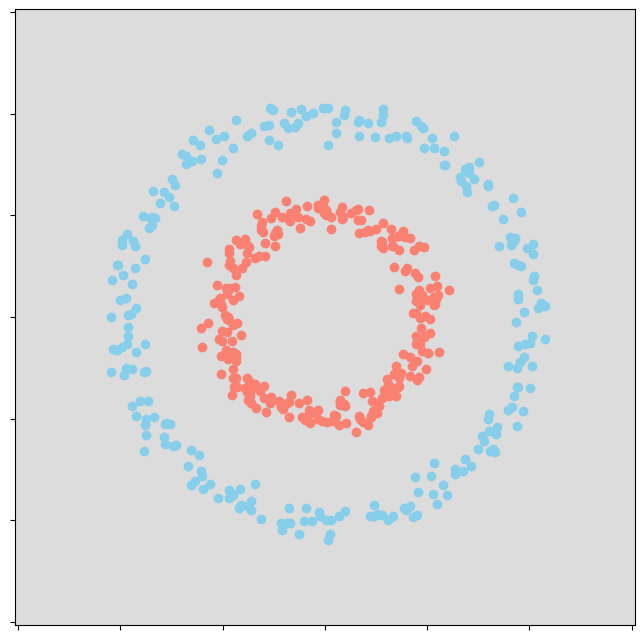

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X,Y=make_circles(n_samples=500,factor=0.5,noise=0.05)

#resolucion del mapa de prediccion:
res=100

#coordenadas del mapa de prediccion:
_x0=np.linspace(-1.5,1.5,res)
_x1=np.linspace(-1.5,1.5,res)

#input con cada combo de coordenadas del mapa de prediccion:

_px=np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

#objeto vacio a 0.5 del mapa de prediccion :
_py=np.zeros((res,res))+0.5

#visualizacion del mapa de prediccion:
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_py,cmap='coolwarm',vmin=0,vmax=1)

#visualizacion de la nuve de datos:
plt.scatter(X[Y==0,0], X[Y==0,1], c='skyblue')
plt.scatter(X[Y==1,0], X[Y==1,1], c='salmon')


plt.tick_params(labelbottom=False,labelleft=False)

In [2]:
# keras:

import tensorflow as tf
import tensorflow.keras as kr




lr=0.01
nn=[2,16,8,1] #numero de neuronas por capa 

# creamos el objeto que contendra a nuestra red neuronal , como secuencia de capas 
model = kr.Sequential()

#a;adimos la capa 1:
l1=model.add(kr.layers.Dense(nn[1],activation='relu'))

#a;adimos la capa 2:
l2=model.add(kr.layers.Dense(nn[2],activation='relu'))

#a;adimos la capa 3:
l3=model.add(kr.layers.Dense(nn[3],activation='sigmoid'))




In [3]:
#compilamos el modelo definiendo la funcion de coste y el optimizador 

model.compile(loss='mse',optimizer=kr.optimizers.SGD(learning_rate=lr),metrics=['mae'])

#se entrena el modelo
model.fit(X,Y,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2364 - mae: 0.4828  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2314 - mae: 0.4778 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2375 - mae: 0.4845 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.2338 - mae: 0.4806
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.2342 - mae: 0.4814
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.2375 - mae: 0.4849
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.2343 - mae: 0.4816
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.2365 - mae: 0.4839
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.2329 - mae: 0.4803
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2349 - mae: 0.4826
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.2322 - mae: 0.4799
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2343 - mae: 0.4820
Epoch 13/100
16

In [4]:
#con sklearn:

import sklearn as sk
from sklearn.neural_network import MLPRegressor

clf=MLPRegressor(solver='sgd',
                                   learning_rate_init=lr,
                                   hidden_layer_sizes=tuple(nn[1:]),
                                   verbose=True,
                                   n_iter_no_change=1000,
                                   batch_size=64)

clf.fit(X,Y)
                                

Iteration 1, loss = 1.35663499
Iteration 2, loss = 0.54371572
Iteration 3, loss = 0.16782023
Iteration 4, loss = 0.13213817
Iteration 5, loss = 0.14603330
Iteration 6, loss = 0.13753257
Iteration 7, loss = 0.12749020
Iteration 8, loss = 0.12521197
Iteration 9, loss = 0.12568334
Iteration 10, loss = 0.12553048
Iteration 11, loss = 0.12515068
Iteration 12, loss = 0.12502906
Iteration 13, loss = 0.12510365
Iteration 14, loss = 0.12511649
Iteration 15, loss = 0.12503255
Iteration 16, loss = 0.12505359
Iteration 17, loss = 0.12504799
Iteration 18, loss = 0.12520217
Iteration 19, loss = 0.12507000
Iteration 20, loss = 0.12504453
Iteration 21, loss = 0.12509113
Iteration 22, loss = 0.12503125
Iteration 23, loss = 0.12506819
Iteration 24, loss = 0.12507443
Iteration 25, loss = 0.12503676
Iteration 26, loss = 0.12504435
Iteration 27, loss = 0.12508256
Iteration 28, loss = 0.12505542
Iteration 29, loss = 0.12505810
Iteration 30, loss = 0.12509751
Iteration 31, loss = 0.12508739
Iteration 32, los

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)

In [5]:
# Utilizando sklearn con el dataset iris:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

iris=load_iris()
X,y=iris.data, iris.target



In [6]:
#explorando los datos (opcional)
print(type(iris))
print(iris.keys())
print(iris['data'])
print(iris['target'])
print(iris['target_names'])
print(iris['DESCR'])
print(iris['feature_names'])

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]


In [7]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
# creando la intancia de MLPclassifier 

mlp_clf=MLPClassifier(hidden_layer_sizes=(100),
                      activation='relu',
                      solver='adam',
                      max_iter=100,
                      random_state=42,verbose=True)

In [9]:
#entrenando el modelo 
mlp_clf.fit(X_train_scaled,y_train)

Iteration 1, loss = 1.16374923
Iteration 2, loss = 1.14090611
Iteration 3, loss = 1.11857816
Iteration 4, loss = 1.09677375
Iteration 5, loss = 1.07547149
Iteration 6, loss = 1.05468504
Iteration 7, loss = 1.03440573
Iteration 8, loss = 1.01462373
Iteration 9, loss = 0.99535820
Iteration 10, loss = 0.97658926
Iteration 11, loss = 0.95833257
Iteration 12, loss = 0.94053852
Iteration 13, loss = 0.92322169
Iteration 14, loss = 0.90638373
Iteration 15, loss = 0.89000670
Iteration 16, loss = 0.87408395
Iteration 17, loss = 0.85861030
Iteration 18, loss = 0.84357120
Iteration 19, loss = 0.82895431
Iteration 20, loss = 0.81476466
Iteration 21, loss = 0.80097410
Iteration 22, loss = 0.78759157
Iteration 23, loss = 0.77460302
Iteration 24, loss = 0.76199129
Iteration 25, loss = 0.74975377
Iteration 26, loss = 0.73786826
Iteration 27, loss = 0.72632581
Iteration 28, loss = 0.71511871
Iteration 29, loss = 0.70424319
Iteration 30, loss = 0.69368183
Iteration 31, loss = 0.68342580
Iteration 32, los

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=42,
              verbose=True)

In [10]:
y_pred=mlp_clf.predict(X_test_scaled)
print(y_test)
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [11]:
# precision del modelo:

accuracy=accuracy_score(y_test,y_pred)
print("Precision del modelo ",accuracy)

Precision del modelo  0.9333333333333333


In [12]:
# utilizando MLPRegresor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [13]:

housing = fetch_california_housing()
X, y = housing.data, housing.target

# Explorando los datos (Opcional)
type(housing)
housing.keys()
housing['data']
housing['target']
housing['target_names']
housing['DESCR']
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para un mejor rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,),
                       activation='relu',
                       solver='adam',
                       max_iter=100,
                       random_state=42,
                       verbose=True)

In [16]:
mlp_reg.fit(X_train_scaled,y_train)

y_pred=mlp_reg.predict(X_test_scaled)

Iteration 1, loss = 1.62056447
Iteration 2, loss = 0.43678846


Iteration 3, loss = 0.32700527
Iteration 4, loss = 0.28069940
Iteration 5, loss = 0.24814135
Iteration 6, loss = 0.22803342
Iteration 7, loss = 0.21538976
Iteration 8, loss = 0.20787968
Iteration 9, loss = 0.20154389
Iteration 10, loss = 0.19743378
Iteration 11, loss = 0.19321222
Iteration 12, loss = 0.18961729
Iteration 13, loss = 0.18678600
Iteration 14, loss = 0.18383630
Iteration 15, loss = 0.18157601
Iteration 16, loss = 0.17968086
Iteration 17, loss = 0.17775103
Iteration 18, loss = 0.17538371
Iteration 19, loss = 0.17423819
Iteration 20, loss = 0.17407294
Iteration 21, loss = 0.17085613
Iteration 22, loss = 0.16995187
Iteration 23, loss = 0.16823352
Iteration 24, loss = 0.16798530
Iteration 25, loss = 0.16717835
Iteration 26, loss = 0.16566984
Iteration 27, loss = 0.16730781
Iteration 28, loss = 0.16499618
Iteration 29, loss = 0.16261953
Iteration 30, loss = 0.16145474
Iteration 31, loss = 0.16053131
Iteration 32, loss = 0.16002333
Iteration 33, loss = 0.16125255
Iteration 34, l

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
# calculando el error cuadratuco medio

mse=mean_squared_error(y_test,y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

Error cuadrático medio: 0.33
